In [ ]:
import torch

# 示例列表
lst = [10, 20, 15, 30, 5]

# 转换为 torch 张量
tensor = torch.tensor(lst)

# 选取 top K 值和索引
K = 3
topK_values, topK_indices = torch.topk(tensor, K)

print("Top K 值:", topK_values)
print("Top K 索引:", topK_indices)


In [ ]:
import numpy as np

# 示例列表
lst = [10, 20, 10, 30, 5]

# 转换为 numpy 数组
arr = np.array(lst)

# 选取 top K 值和索引
K = 3
topK_indices = np.argsort(arr)[-K:][::-1]  # 获取前K个最大值的索引
topK_values = arr[topK_indices]  # 获取前K个最大值

print("Top K 值:", topK_values)
print("Top K 索引:", topK_indices)
[lst[i] for i in topK_indices]

In [ ]:
import openai
client = openai.OpenAI(
            api_key="sk-RyKH6By6kKahMAjsACAWzuDBSyF4LaTTwx0RXvTxz8n2IsPu",  # this is also the default, it can be omitted
            base_url="https://guoke.huiyan-ai.com/v1/"
        )
# conversation = list()
# prompt_1 = "Please convert the triple <{h},{r},{t}> into a natural language statement.".format(h="England",r="contains location",t="Pontefract")
# conversation.append(
#                 {'role': 'user',
#                 "content": prompt_1})
# prompt_2 = "Please convert the triple <{h},{r},{t}> into a natural language statement.".format(h="The Last King of Scotland",r="genre film",t="War film")
# conversation.append(
#                 {'role': 'user',
#                 "content": prompt_2})
# print(conversation)
# response = client.chat.completions.create(
#             model="gpt-3.5-turbo-0125",  #选择的GPT模型名称
#             messages=conversation,
#             temperature=0.7,
#         )

In [ ]:
response.choices[0].message.content

In [ ]:
import re

# 示例字符串
s = 'The Answer is: [Afghanistan, Iran]'

# 使用正则表达式提取方括号内的内容
result = re.findall(r'\[(.*?)\]', s)

# 将字符串按逗号分割并去除空格
countries = [country.strip() for country in result[0].split(',')]
print(result)
print(result[0])
print(countries)


In [ ]:
r = "artists genre music"
neighbors = {
	"artists genre music": ["Siouxsie & the Banshees", "Bryan Ferry", "Sparks"],
	"parent genre genre music": ["Punk rock", "Pop music"]
}
for relation, tail_entities in neighbors.items():
    if relation.strip().lower() == r.strip().lower():
        continue
    for tail_entity in tail_entities:
        triplet = relation + '\t' + tail_entity
        print(triplet)

In [ ]:
import json
with open("/home/kayla/lhy/code/multi-source/data/FB15k237/relations.json", 'r') as f:
    data = json.load(f)
relation_data = {v: k for k,v in data.items()}
with open("/home/kayla/lhy/code/multi-source/data/FB15k237/relation2template.json", 'r') as f:
    relation_template = json.load(f)
relation_template[relation_data["prequel film "]]

In [ ]:
prompt_1 = 'hello' 

conversation = list()
conversation.append(
                {'role': 'user',
                "content": prompt_1})
response = client.chat.completions.create(
            model="gpt-3.5-turbo-0125",  #选择的GPT模型名称
            messages=conversation,
            temperature=0.7,
        )
response.choices[0].message.content

In [ ]:
prompt_1 = '**The relevant description of the entity**: ["The drum is a member of the percussion group of musical instruments. In the Hornbostel-Sachs classification system, it is a membranophone. Drums consist of at least one membrane, called a drumhead or drum skin, that is stretched over a shell and struck, either directly with the player\'s hands, or with].\n **The relation template corresponding to the triple<Drum,instrumentalists instrument music ,?>**: [[MASK] plays Drum .].\n Please understand the semantic relationship between entities and convert <[MASK] plays Drum .> into a natural language question about [MASK] based on the information provided above.'

conversation = list()
conversation.append(
                {'role': 'user',
                "content": prompt_1})
response = client.chat.completions.create(
            model="gpt-3.5-turbo-0125",  #选择的GPT模型名称
            messages=conversation,
            temperature=0.7,
        )
response.choices[0].message.content

In [ ]:
import json
relation2template_path = "data/FB15k237/relations2_finalTemplate.json"
relation_path = "/home/kayla/lhy/code/multi-source/data/FB15k237/relations.json"
neighbor_path = "/home/kayla/lhy/code/multi-source/data/FB15k237/neighbors.txt"

with open(relation2template_path, 'r') as f:
    relation2template = json.load(f)    #dict()

with open(relation_path) as f:
    relations = json.load(f)    #dict()
# relations = {v: k for k,v in relations.items()}

with open(neighbor_path) as f:
    lines = f.readlines()

neighbors = dict()
for line in lines:
    h, r, t = line.split('\n')[0].split('\t')
    if r not in neighbors:
        neighbors[r] = list()
    neighbors[r].append((h,t))

In [ ]:
i = 14
times = 0
for trans_relation, template in relation2template.items():
    if times == i:
        relation = relations[trans_relation]
        l = neighbors[relation]
        for i,item in enumerate(l):
            if i>5:
                break
            h, t = item
            triplet = h + "||" + relation  + "||"+ t
            print(triplet)
        print(template)
        break
    times += 1

In [ ]:
with open("data/FB15k237/test.txt.json") as f:
    test_data = json.load(f)
for item in test_data:
    print(item)
    break

In [ ]:
import os
import json

def load_json_data(path):
    with open(path) as f:
        data = json.load(f)
    return data


search_item = {
        "head_id": "/m/0155w",
        "head": "Blues",
        "relation": "artists genre music ",
        "tail_id": "/m/0g824",
        "tail": "Alicia Keys"
}

file_dir = "data/FB15k237/small_test"
for file in os.listdir(file_dir):
    path = os.path.join(file_dir, file)
    data = load_json_data(path)
    for item in data:
        if item == search_item:
            print(file)


In [ ]:
from base_methods import load_json_data, save_json_data

# entity_path = "data/WN18RR/entities.json"
# entity_data = load_json_data(entity_path)   # list()
# entity_dict = {item["entity_id"]: ' '.join(item["entity"].split('_')[:-2]) for item in entity_data}  # dict()
# save_json_data("data/WN18RR/entity_id2name.json",entity_dict)

# entity_dict = {' '.join(item["entity"].split('_')[:-2]) : item["entity_id"] for item in entity_data}  # dict()
# save_json_data("data/WN18RR/entity_name2id.json",entity_dict)


entity_path = "data/FB15k237/entities.json"
entity_data = load_json_data(entity_path)   # list()
entity_dict = {item["entity_id"]: item["entity"] for item in entity_data}  # dict()
save_json_data("data/FB15k237/entity_id2name.json",entity_dict)

entity_dict = {item["entity"] : item["entity_id"] for item in entity_data}  # dict()
save_json_data("data/FB15k237/entity_name2id.json",entity_dict)

# relation_path = "data/FB15k237/relations.json"
# relation_data = load_json_data(relation_path)   # dict()

# candidate_path = "data/FB15k237/candidate_results/test.json"
# candidate_data = load_json_data(candidate_path)


# new_dict = dict()
# for item in candidate_data:
#     triplet = item["triplet"]
#     h, r, t = entity_dict[triplet[0]], relation_data[triplet[1]], entity_dict[triplet[2]]
#     inverse = item["inverse"]
#     key = h + '||' + r + '||' + t + '||' + str(inverse)
#     if key not in new_dict:
#         new_dict[key] = list()
#     new_dict[key].append(item)
#     if len(new_dict[key]) > 1:
#         print(key)
# save_json_data("temp.json", new_dict)

In [ ]:
s = "sss"
print(type([s]))

In [2]:
import re

# 这是包含两个列表的文本
text = """
Based on the provided knowledge, I’ll complete the tasks as requested.

### Task (1): Sorting the candidate answers

The question asks for entities that fall under "periodical" as a hypernym. Entities that are types of periodicals, such as magazines, newspapers, or journals, should be prioritized over unrelated terms.

The list of sorted candidate answers is [magazine | bulletin | newssheet | comic book | colour supplement | gutter press | yearly | paper | number | periodical | source | centrefold | stuffer | written matter | drawing | encyclopedia | bookclub | tuck shop | greengrocery | syndicate].

### Task (2): Predicting new entities

Based on the knowledge, potential new entities related to "periodical" could include other types of regular publications or serial publications.

The predicted new entities are [journal | newsletter | almanac | digest | gazette | pamphlet | review | weekly | tabloid | quarterly].
"""

# 使用正则表达式匹配两个列表
sorted_candidates_match = re.search(r"The list of sorted candidate answers is \[(.*?)\]", text)
predicted_entities_match = re.search(r"The predicted new entities are: \[(.*?)\]", text)

# 提取并将字符串分割成列表
sorted_candidates = sorted_candidates_match.group(1).split("|") if sorted_candidates_match else []
sorted_candidates = [sorted_candidate.strip() for sorted_candidate in sorted_candidates]
predicted_entities = predicted_entities_match.group(1).split("|") if predicted_entities_match else []

# 打印结果
print("Sorted Candidate Answers:", sorted_candidates_match.group(1).split(", "))
print("Predicted New Entities:", sorted_candidates)


Sorted Candidate Answers: ['magazine | bulletin | newssheet | comic book | colour supplement | gutter press | yearly | paper | number | periodical | source | centrefold | stuffer | written matter | drawing | encyclopedia | bookclub | tuck shop | greengrocery | syndicate']
Predicted New Entities: ['magazine', 'bulletin', 'newssheet', 'comic book', 'colour supplement', 'gutter press', 'yearly', 'paper', 'number', 'periodical', 'source', 'centrefold', 'stuffer', 'written matter', 'drawing', 'encyclopedia', 'bookclub', 'tuck shop', 'greengrocery', 'syndicate']


In [ ]:
a = 1.23729472
print(f"result: {a:.4}")

In [ ]:
# 原文件名
filename = "text_1_gpt4omini_allinfo_xx.json"

# 根据倒数第二个下划线分割
result = filename.rsplit('_', 2)[0]

# 输出结果
print(result)  # 输出 'text_1'


['proclaim', 'declare', 'call', 'report', 'promulgate', 'shout', 'transmit', 'denote', 'verbalize', 'publicize', 'observe', 'cry', 'signalize', 'usher in', 'formalize', 'admit', 'hold', 'signalize', 'publicize', 'declare']
['broadcast', 'narrate', 'present', 'introduce', 'voice', 'announce', 'disclose', 'convey', 'inform', 'notify']


In [ ]:
s = "<The list of sorted candidate answers is [Chancellor | President | Principal | Provost | Rector | Dean-GB | Master | Fellow | Chairman | Executive Director-GB | Managing Director-GB | Monarch-GB | Prime minister-GB | Governor-General | Crown prince | Finance minister | General-GB | Premier | Headmaster-GB | Prime Minister of the United Kingdom]>"

new_sentence = "xxxxxxxxxxx"
pattern = r"(by completing the sentence\s)(.*?\.)"
result = re.sub(pattern, r"\1" + new_sentence, s)
result

In [ ]:
# 对文件重命名
import os
path_dir = "/home/kayla/lhy/code/multi-source/data/FB15k237/answer_null"
for file in os.listdir(path_dir):
    old_path = os.path.join(path_dir, file)
    new_path = os.path.join(path_dir, file.replace("text", "test"))
    os.rename(old_path, new_path)

In [ ]:
num = 205
test_files = ["test_" + str(i) + "_gpt4omini_allinfo.json" for i in range(191, num+1)]
answer_files = ["test" + str(i) + "_answer.json" for i in range(191, num+1)]
for file1, file2 in zip(test_files, answer_files):
    print(file1)
    print(file2)

In [ ]:
import os
import random
from base_methods import load_json_data, save_json_data

dir_path = "data/FB15k237/llm_answers/gpt-4o-mini"
files = os.listdir(dir_path)
for file in files:
    new_list = list()
    path = os.path.join(dir_path, file)
    data = load_json_data(path)
    random_numbers = random.sample(range(0, 101), 1)
    for i, item in enumerate(data):
        if i in random_numbers:
            back_sort = item["backward_sorted_candidates"]
            head = item["head"]
            if head in back_sort:
                back_sort.remove(head)
            back_sort.insert(0, head)
            item["backward_sorted_candidates"] = back_sort
        new_list.append(item)
    save_json_data(path, new_list)


In [ ]:
import random

# 从范围 1 到 10 中随机选取两个不同的整数
random_numbers = random.sample(range(1, 11), 2)

print(1 in random_numbers)


In [ ]:
# 原始列表
l = ['hoot_VB_1', 'jump_high_ADJ_2', 'run_fast_NN_3']

# 批量处理：保留每个字符串的前两部分并用空格连接
l1 = [' '.join(item.split('_')[:2]) for item in l]

print(l1)  # 输出: ['s hoot', 'jump high', 'run fast']

In [ ]:
def remove_duplicates(original_list):
    seen = set()  # 用于记录已经出现的元素
    result = []   # 用于存储去重后的结果

    for item in original_list:
        if item not in seen:
            seen.add(item)  # 将新元素添加到集合中
            result.append(item)  # 将新元素添加到结果列表中

    return result

# 示例
my_list = ["modification",
            "change",
            "change",
            "change",
            "change",
            "transition",
            "transition",
            "shifting",
            "transmutation",
            "transmutation",
            "commutation",
            "substitution",
            "movement",
            "lessening",
            "reversal",
            "retrogression",
            "modifier",
            "transferrer",
            "shift",
            "shift"]
unique_list = remove_duplicates(my_list)
print(unique_list)  # 输出: ['apple', 'banana', 'orange', 'pear']


In [2]:
import os
from base_methods import load_json_data, save_json_data
from llm.final_llm import llm_predict_rank
from collections import  OrderedDict

test_dir = "data/FB15k237/small_test"
answer_dir = "data/FB15k237/llm_answers/pure/gpt-4o-mini"
for i in range(1, len(os.listdir(answer_dir))+1):
    answer_file = f"test{i}_answer.json"
    test_file = f"test_{i}_gpt4omini_allinfo.json"
    answer_path = os.path.join(answer_dir, answer_file)
    test_path = os.path.join(test_dir, test_file)
    answer_data = load_json_data(answer_path)
    test_data = load_json_data(test_path)

    new_answer_list = list()
    for answer_item, test_item in zip(answer_data, test_data):
        forward_ground_truth_rank = test_item["forward_ground_truth_rank"]
        backward_ground_truth_rank = test_item["backward_ground_truth_rank"]
        forward_llm_rank = llm_predict_rank(answer_item["forward_sorted_candidates"], answer_item["tail"])
        backward_llm_rank = llm_predict_rank(answer_item["backward_sorted_candidates"], answer_item["head"])

        new_answer_item = {
            "head_id": answer_item["head_id"],
            "head": answer_item["head"],
            "relation": answer_item["relation"],
            "tail_id": answer_item["tail_id"],
            "tail": answer_item["tail"],
            "forward_source_rank": forward_ground_truth_rank,
            "forward_llm_rank": forward_llm_rank,
            "backward_source_rank": backward_ground_truth_rank,
            "backward_llm_rank": backward_llm_rank,
            "forward_prompt": answer_item["forward_prompt"],
            "forward_sorted_candidates": answer_item["forward_sorted_candidates"],
            "forward_predicted_entities": answer_item["forward_predicted_entities"],
            "backward_prompt": answer_item["backward_prompt"],
            "backward_sorted_candidates": answer_item["backward_sorted_candidates"],
            "backward_predicted_entities": answer_item["backward_predicted_entities"]
        }

        new_answer_list.append(new_answer_item)
    save_json_data(answer_path, new_answer_list)

In [4]:
from collections import Counter

# 示例列表
answer = [
    {"head": "xxx", "relation": "yyy", "tail": "zzz", "prompt": "qqq"},
    {"head": "aaa", "relation": "yyy", "tail": "bbb", "prompt": "qqq"},
    {"head": "ccc", "relation": "zzz", "tail": "ddd", "prompt": "qqq"},
    {"head": "eee", "relation": "yyy", "tail": "fff", "prompt": "qqq"}
]

# 使用列表解析提取每个字典中的 "relation" 值
relation_list = [item["relation"] for item in answer]

# 使用 Counter 统计每个 "relation" 的出现频率
relation_counts = Counter(relation_list)

print(relation_counts["yyy"])


3


In [10]:
import re

s = 'The scores of the statements is [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100].'

# 使用正则表达式提取列表中的所有数字，并转换为整数列表
numbers = list(map(int, re.findall(r'\d+', s)))

# 找到最大值的索引
max_value = max(numbers)
max_index = numbers.index(max_value)

print("最大值的索引:", max_index)
print("最大值:", max_value)


最大值的索引: 9
最大值: 100


In [148]:
import re
answer = """
**Task 1: Sorting the candidate answers based on the provided knowledge.**

The knowledge provided suggests that "prawn" is a type of "decapod crustacean," and the goal question asks for a larger category or group that prawn belongs to. Based on the knowledge, "prawn" is a member of the order "Decapoda," which encompasses groups such as shrimp, lobsters, and crabs. From the provided list, the most relevant larger categories or groups for prawn would be taxonomic groups like families or suborders, such as "Palaemonidae," "Peneidae," and "Suborder Reptantia."

Here is the sorted list of candidate answers based on this reasoning:

<The list of sorted candidate answers is [palaemonidae | peneidae | family crangonidae | family astacidae | palinuridae | nephropsidae | genus cambarus | paguridae | homaridae | palaemon_NN_1 | portunidae | suborder reptantia | lepadidae | majidae | pinnotheridae | phthiriidae | oniscidae | menippe | subside | palinurus]>

**Task 2: Predicting possible new entities.**

In addition to the given answers, we can predict some new entities that are larger categories or groups related to prawns and decapod crustaceans. These might include other families, suborders, or even classes that prawns could be a part of.

<The predicted new entities are [order decapoda | class malacostraca | infraorder caridea | family lucicitiidae | family lysmatidae | suborder dendrobranchiata | family aristeidae | family heikeidae | family thoridae | suborder natantia]>
"""

sorted_candidates_match = re.search(r"The list of sorted candidate answers is \[(.*?)\]", answer)
predicted_entities_match = re.search(r"The predicted new entities are \[(.*?)\]", answer)

# 提取并将字符串分割成列表
sorted_candidates = sorted_candidates_match.group(1).split("|") if sorted_candidates_match else []
sorted_candidates = [sorted_candidate.strip() for sorted_candidate in sorted_candidates]

predicted_entities = predicted_entities_match.group(1).split("|") if predicted_entities_match else []  # list()
predicted_entities = [predicted_entity.strip() for predicted_entity in predicted_entities]

sorted_candidates = ', '.join(f'"{item}"' for item in sorted_candidates)
predicted_entities = ', '.join(f'"{item}"' for item in predicted_entities)

print(sorted_candidates)
print(predicted_entities)

"palaemonidae", "peneidae", "family crangonidae", "family astacidae", "palinuridae", "nephropsidae", "genus cambarus", "paguridae", "homaridae", "palaemon_NN_1", "portunidae", "suborder reptantia", "lepadidae", "majidae", "pinnotheridae", "phthiriidae", "oniscidae", "menippe", "subside", "palinurus"
"order decapoda", "class malacostraca", "infraorder caridea", "family lucicitiidae", "family lysmatidae", "suborder dendrobranchiata", "family aristeidae", "family heikeidae", "family thoridae", "suborder natantia"


In [14]:
import re
def process_answer(answer):
    # 使用正则表达式提取指定句子
    sentence_match = re.search(r"The sentence was judged as (\w+)", answer)
    if sentence_match:
        extracted_sentence = sentence_match.group(0)  # 提取完整句子
        extracted_keyword = sentence_match.group(1)  # 提取关键字
        return extracted_keyword
    else:
        return answer

s = 'The sentence \"Hempstead is in the Eastern Time Zone time zone.\" is correct. Based on the background knowledge provided, Hempstead is located in Nassau County, New York, which is part of the Eastern Time Zone. The repetition of \"time zone\" is a minor redundancy but does not affect the correctness of the statement regarding the location of Hempstead within the Eastern Time Zone.\n\n<The sentence was judged as Correct>'
answer = process_answer(s)
answer

'Correct'

/home/kayla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kayla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kayla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kayla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40784 (\N{CJK UNIFIED IDEOGRAPH-9F50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kayla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas

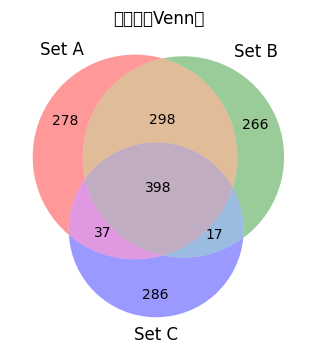

In [35]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# 数据示例
venn_labels = {
    '100': 278,  # 只在A
    '010': 266,  # 只在B
    '001': 286,  # 只在C
    '110': 298,  # A和B
    '101': 37,   # A和C
    '011': 17,   # B和C
    '111': 398   # A, B和C
}

# 绘制Venn图
plt.figure(figsize=(8, 4))  # 宽拉长点
venn = venn3(subsets=venn_labels, set_labels=('Set A', 'Set B', 'Set C'))

# 手动调整圆的位置，确保水平对齐（这里假设中心点对齐）
for circle in venn.circles:
    circle.set_center((circle.center[0] * 2, 0))  # 水平方向调整
    # 保持半径未动


plt.show()

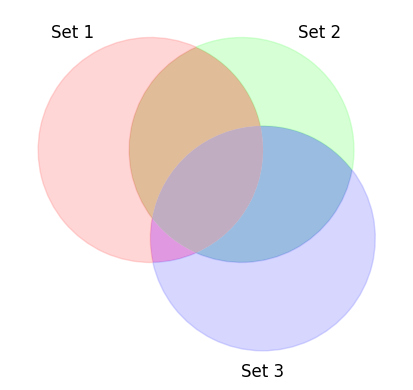

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 定义三个集合
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}
set3 = {4, 6, 7, 8}

# 绘制维恩图，指定每个圆圈的颜色
venn = venn3([set1, set2, set3], set_labels=('Set 1', 'Set 2', 'Set 3'))

# 为每个圆圈设置颜色
venn.get_label_by_id('100').set_text('')  # 仅显示集合1的区域
venn.get_label_by_id('010').set_text('')  # 仅显示集合2的区域
venn.get_label_by_id('001').set_text('')  # 仅显示集合3的区域
venn.get_label_by_id('110').set_text('')  # 集合1和2的交集
venn.get_label_by_id('011').set_text('')  # 集合2和3的交集
venn.get_label_by_id('101').set_text('')  # 集合1和3的交集
venn.get_label_by_id('111').set_text('')  # 三个集合的交集

# 设置每个圆圈的颜色
venn.get_patch_by_id('100').set_color('#FF9999')  # Set 1
venn.get_patch_by_id('010').set_color('#99FF99')  # Set 2
venn.get_patch_by_id('001').set_color('#9999FF')  # Set 3

# 显示图形
plt.show()


In [150]:
import os

from base_methods import load_json_data, save_json_data


dir_path = "data/FB15k237/evaluation/llm/merge"
save_dir = "data/FB15k237/evaluation/llm/merge/case"
files = os.listdir(dir_path)
for file in files:
    path = os.path.join(dir_path, file)
    data = load_json_data(path)
    new_list = list()
    for item in data:
        human_answer = item["human_answer"]
        gpt_answer = item["gpt-4o-wiki_answer"]
        FS_answer = item["FS_answer"]
        tail = item["tail"]
        if human_answer == "Correct" and FS_answer == "Correct" and tail not in item["sentence"] and gpt_answer == "Wrong":
            new_list.append(item)
    if new_list:
        save_json_data(os.path.join(save_dir, file), new_list)

In [64]:
import os

from base_methods import load_json_data, save_json_data
dir_path = "data/FB15k237/llm_answers/new_rerank/gpt-4o-mini"
save_dir = "data/FB15k237/llm_answers/new_rerank/select"

files = os.listdir(dir_path)
for file in files:
    path = os.path.join(dir_path, file)
    data = load_json_data(path)
    new_list = list()
    for item in data:
        forward_source_rank = item["forward_source_rank"]
        forward_llm_rank = item["forward_llm_rank"]
        backward_source_rank = item["backward_source_rank"]
        backward_llm_rank = item["backward_llm_rank"]

        if forward_source_rank <= 20 and forward_llm_rank == -1:
            new_list.append(item)
        elif backward_source_rank <= 20 and backward_llm_rank == -1:
            new_list.append(item)
    if new_list:
        save_json_data(os.path.join(save_dir, file), new_list)